<a href="https://colab.research.google.com/github/yadavneha22/FDS_LABwork/blob/main/A_B_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# A/B testing is a user experience research methodology.A/B tests consist of a randomized experiment with two variants, A and B. It includes application of statistical hypothesis testing or "two-sample hypothesis testing" as used in the field of statistics. A/B testing is a way to compare two versions of a single variable, typically by testing a subject's response to variant A against variant B, and determining which of the two variants is more effective.
A/B tests are useful for understanding user engagement and satisfaction of online features, such as a new feature or product. Large social media sites like LinkedIn, Facebook, and Instagram use A/B testing to make user experiences more successful and as a way to streamline their services.

Version A might be the currently used version (control), while version B is modified in some respect (treatment). For instance, on an e-commerce website the purchase funnel is typically a good candidate for A/B testing, as even marginal decreases in drop-off rates can represent a significant gain in sales. Significant improvements can sometimes be seen through testing elements like copy text, layouts, images and colors,[9] but not always. In these tests, users only see one of two versions, as the goal is to discover which of the two versions is preferable.
```



In [4]:
import pandas as pd

control_data = pd.read_csv('/content/control_data.csv')
experiment_data = pd.read_csv('/content/experiment_data.csv')

In [5]:
control_data.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7723,687,134.0,70.0
1,"Sun, Oct 12",9102,779,147.0,70.0
2,"Mon, Oct 13",10511,909,167.0,95.0
3,"Tue, Oct 14",9871,836,156.0,105.0
4,"Wed, Oct 15",10014,837,163.0,64.0


In [6]:
experiment_data.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7716,686,105.0,34.0
1,"Sun, Oct 12",9288,785,116.0,91.0
2,"Mon, Oct 13",10480,884,145.0,79.0
3,"Tue, Oct 14",9867,827,138.0,92.0
4,"Wed, Oct 15",9793,832,140.0,94.0


In [7]:
control_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         37 non-null     object 
 1   Pageviews    37 non-null     int64  
 2   Clicks       37 non-null     int64  
 3   Enrollments  23 non-null     float64
 4   Payments     23 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.6+ KB


In [8]:
experiment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         37 non-null     object 
 1   Pageviews    37 non-null     int64  
 2   Clicks       37 non-null     int64  
 3   Enrollments  23 non-null     float64
 4   Payments     23 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.6+ KB


In [9]:
control_data.isna().sum()

Date            0
Pageviews       0
Clicks          0
Enrollments    14
Payments       14
dtype: int64

In [10]:
experiment_data.isna().sum()

Date            0
Pageviews       0
Clicks          0
Enrollments    14
Payments       14
dtype: int64

In [11]:
control_data[control_data['Enrollments'].isna()]

,Date,Pageviews,Clicks,Enrollments,Payments
23,"Mon, Nov 3",9437,788,NaN,NaN
24,"Tue, Nov 4",9420,781,NaN,NaN
25,"Wed, Nov 5",9570,805,NaN,NaN
26,"Thu, Nov 6",9921,830,NaN,NaN
27,"Fri, Nov 7",9424,781,NaN,NaN
28,"Sat, Nov 8",9010,756,NaN,NaN
29,"Sun, Nov 9",9656,825,NaN,NaN
30,"Mon, Nov 10",10419,874,NaN,NaN
31,"Tue, Nov 11",9880,830,NaN,NaN
32,"Wed, Nov 12",10134,801,NaN,NaN


In [12]:
# Combine with Experiment data
data_total = pd.concat([control_data, experiment_data])
data_total.sample(10)

,Date,Pageviews,Clicks,Enrollments,Payments
31,"Tue, Nov 11",9931,831,NaN,NaN
25,"Wed, Nov 5",9570,805,NaN,NaN
22,"Sun, Nov 2",8836,724,182.0,103.0
6,"Fri, Oct 17",9088,780,127.0,44.0
16,"Mon, Oct 27",9655,771,213.0,119.0
3,"Tue, Oct 14",9871,836,156.0,105.0
30,"Mon, Nov 10",10445,851,NaN,NaN
9,"Mon, Oct 20",10667,861,165.0,97.0
35,"Sat, Nov 15",8630,743,NaN,NaN
10,"Tue, Oct 21",10660,867,196.0,105.0


In [13]:
import numpy as np
np.random.seed(7)
import sklearn.utils

# Add row id
data_total['row_id'] = data_total.index

# Create a Day of Week feature
data_total['DOW'] = data_total['Date'].str.slice(start=0, stop=3)

# Remove missing data
data_total.dropna(inplace=True)

# Add a binary column Experiment to denote
# if the data was part of the experiment or not (Random)
data_total['Experiment'] = np.random.randint(2, size=len(data_total))

# Remove missing data
data_total.dropna(inplace=True)

# Remove Date and Payments columns
del data_total['Date'], data_total['Payments']

# Shuffle the data
data_total = sklearn.utils.shuffle(data_total)

In [14]:
# Check the new data
data_total.head()

,Pageviews,Clicks,Enrollments,row_id,DOW,Experiment
21,8460,681,156.0,21,Sat,0
3,9867,827,138.0,3,Tue,1
21,8448,695,142.0,21,Sat,0
13,9434,673,220.0,13,Fri,1
6,9008,748,146.0,6,Fri,1


In [16]:
# Reorder the columns 
data_total = data_total[['row_id', 'Experiment', 'Pageviews', 'Clicks', 'DOW', 'Enrollments']]

In [17]:
# Splitting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_total.loc[:, data_total.columns != 'Enrollments'],\
                                                    data_total['Enrollments'], test_size=0.2)

In [18]:
# Converting strings to numbers
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
X_train['DOW'] = lb.fit_transform(X_train['DOW'])
X_test['DOW'] = lb.transform(X_test['DOW'])

In [19]:
X_train.head()

,row_id,Experiment,Pageviews,Clicks,DOW
16,16,0,9535,759,1
10,10,1,10551,864,5
2,2,0,10480,884,1
3,3,1,9867,827,5
16,16,0,9655,771,1


In [20]:
X_test.head()

,row_id,Experiment,Pageviews,Clicks,DOW
12,12,0,8324,665,4
18,18,1,9262,727,6
1,1,0,9288,785,3
1,1,0,9102,779,3
19,19,0,9345,734,4


In [40]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def calculate_metrics(y_test, y_preds):
    rmse = np.sqrt(mean_squared_error(y_test, y_preds))
    r_sq = r2_score(y_test, y_preds)
    mae = mean_absolute_error(y_test, y_preds)

    print('RMSE Score: {}'.format(rmse))
    print('R2_Squared: {}'.format(r_sq))
    print('MAE Score: {}'.format(mae))

In [41]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

def plot_preds(y_test, y_preds, model_name):
    N = len(y_test)
    plt.figure(figsize=(10,5))
    original = plt.scatter(np.arange(1, N+1), y_test, c='blue')
    prediction = plt.scatter(np.arange(1, N+1), y_preds, c='red')
    plt.xticks(np.arange(1, N+1))
    plt.xlabel('# Oberservation')
    plt.ylabel('Enrollments')
    title = 'True labels vs. Predicted Labels ({})'.format(model_name)
    plt.title(title)
    plt.legend((original, prediction), ('Original', 'Prediction'))
    plt.show()

In [32]:
import statsmodels.api as sm
import sklearn.metrics as metrics
X_train_refined = X_train.drop(columns=['row_id'], axis=1)
linear_regression = sm.OLS(y_train, X_train_refined)
linear_regression = linear_regression.fit()

In [34]:
X_test_refined = X_test.drop(columns=['row_id'], axis=1)
y_preds = linear_regression.predict(X_test_refined)

In [42]:
calculate_metrics(y_test, y_preds)

RMSE Score: 26.8540034259326
R2_Squared: -0.1892893660531696
MAE Score: 21.78333333333333


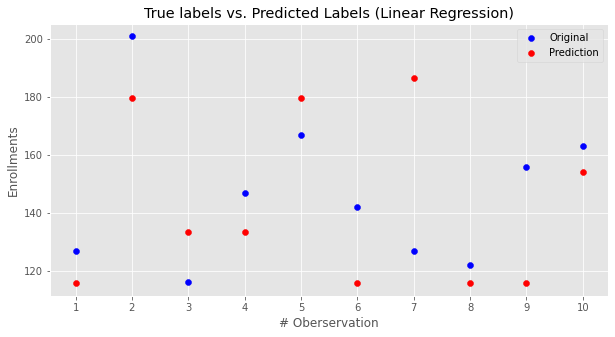

In [43]:
plot_preds(y_test, y_preds, 'Linear Regression')

In [26]:
print(linear_regression.summary())

                                 OLS Regression Results                                
Dep. Variable:            Enrollments   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              400.1
Date:                Mon, 15 Mar 2021   Prob (F-statistic):                    7.92e-27
Time:                        08:46:59   Log-Likelihood:                         -163.65
No. Observations:                  36   AIC:                                      335.3
Df Residuals:                      32   BIC:                                      341.6
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


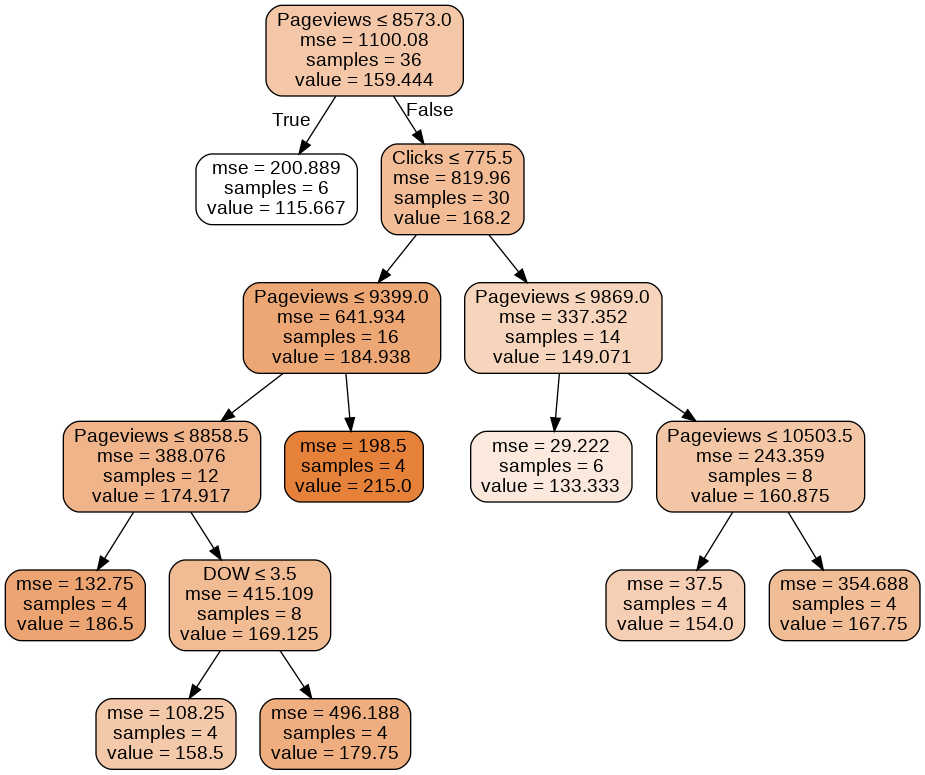

In [38]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data, 
                feature_names=X_train_refined.columns,
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# New Section